In [1]:
import math
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ridge_regression(X, y, lambd = 0.2):
    X = mat(X)
    y = mat(y)
    XTX = X.T*X
#     m, _ = XTX.shape
#     I = np.matrix(np.eye(m))
#     w = (XTX + lambd*I).I*X.T*y
    denom = XTX + eye(shape(X)[1])*lambd
    k = (X.T*(y.T))
    w = denom.I * k
    return w


In [3]:
def ridge_mat(X, y, ntest):
    X = mat(X)
    y = mat(y)
    _, n = X.shape
    ws = np.zeros((ntest, n))
    for i in range(ntest):
        w = ridge_regression(X, y, lambd = i)
        ws[i, :] = w.T
    return ws


In [4]:
if '__main__' == __name__:
    test = 5001
    X_1 = np.loadtxt(open("/Users/zhengqi/Downloads/machine-learning/hw1-data/X_train.csv","rb"),delimiter=",",skiprows=0)
    y_1 = np.loadtxt(open("/Users/zhengqi/Downloads/machine-learning/hw1-data/y_train.csv","rb"),delimiter=",",skiprows=0) 
    U,S,VT=linalg.svd(X_1)

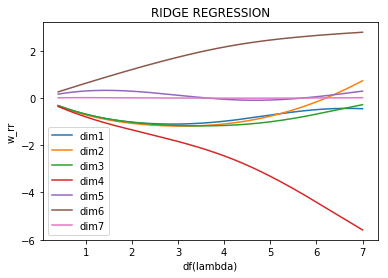

[[ -4.56261393e-01   7.30167300e-01  -2.84618666e-01  -5.58558944e+00
    2.89577742e-01   2.78139798e+00   1.01570909e-02]
 [ -4.45723727e-01   5.77767007e-01  -3.44496869e-01  -5.40968597e+00
    2.51106355e-01   2.76333513e+00   8.12705470e-03]
 [ -4.41309775e-01   4.45740207e-01  -3.99178483e-01  -5.25028919e+00
    2.16905270e-01   2.74640485e+00   6.36260803e-03]
 [ -4.41427858e-01   3.30216630e-01  -4.49199730e-01  -5.10498002e+00
    1.86370785e-01   2.73044869e+00   4.81589621e-03]
 [ -4.44919291e-01   2.28252601e-01  -4.95043457e-01  -4.97181783e+00
    1.59009638e-01   2.71533845e+00   3.45014713e-03]
 [ -4.50927854e-01   1.37569046e-01  -5.37140266e-01  -4.84922254e+00
    1.34413997e-01   2.70096901e+00   2.23660110e-03]
 [ -4.58812731e-01   5.63736678e-02  -5.75872197e-01  -4.73589093e+00
    1.12243202e-01   2.68725316e+00   1.15241426e-03]
 [ -4.68089107e-01  -1.67626735e-02  -6.11577386e-01  -4.63073612e+00
    9.22101518e-02   2.67411784e+00   1.79192074e-04]
 [ -4.78

In [5]:
ws = ridge_mat(X_1, y_1, 5001)
freedom = range(5001)
sums = 0
for i in range(test):
    for j in range(len(S)):
        sums = sums + (S[j]*S[j]/(i+S[j]*S[j]))        
    freedom[i] = sums
    sums = 0
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(lambdas, ws)
w_1 = ws[:,0]
w_2 = ws[:,1]
w_3 = ws[:,2]
w_4 = ws[:,3]
w_5 = ws[:,4]
w_6 = ws[:,5]
w_7 = ws[:,6]
plt.plot(freedom, w_1, label = "dim1")
plt.plot(freedom, w_2, label = "dim2")
plt.plot(freedom, w_3, label = "dim3")
plt.plot(freedom, w_4, label = "dim4")
plt.plot(freedom, w_5, label = "dim5")
plt.plot(freedom, w_6, label = "dim6")
plt.plot(freedom, w_7, label = "dim7")
ax.set_title(u"RIDGE REGRESSION")
plt.xlabel('df(lambda)')
plt.ylabel('w_rr')
plt.legend()
plt.show()
print ws[0:100,:]

In [6]:
#freedom

In [7]:
X_2 = np.loadtxt(open("/Users/zhengqi/Downloads/machine-learning/hw1-data/X_test.csv","rb"),delimiter=",",skiprows=0)
y_2 = np.loadtxt(open("/Users/zhengqi/Downloads/machine-learning/hw1-data/y_test.csv","rb"),delimiter=",",skiprows=0) 
def y_re(X, y, ws, l):
    ws_1 = ws[0:l,:]

    #print ws_1
    #print ws_1[0]
    RMSE = range(l)
    #print len(ws_1)
    for i in range(len(ws_1)):
        y_2_pre = mat(ws_1[i])*mat(X.T)
        y_2_pre = array(y_2_pre)        
        suma = 0    
        
        for j in range(len(y)):
            a = float(y[j])
            b = float(y_2_pre[0][j])
       
            suma = suma + (a-b)*(a-b)        
        b= suma/42        
        c = sqrt(b)
        #print c
        RMSE[i] = c
        
        suma = 0  
    return RMSE 

def X_p(X, p):
    if p == 1:
        return X
    else:
        m, n = X.shape
        R = np.zeros((m, n+6*(p-1)))
        
        for i in range(m):
            for j in range(n):
                R[i][j] = X[i][j]
        for i in range(p-1):            
            for k in range(m):
                for j in range(6):                    
                    if i == 0:
                        R[k][n+j] = X[k][j]*X[k][j]
                    elif i == 1:
                        R[k][n+j] = X[k][j]*X[k][j]*X[k][j]
            n = n+6
        return R
            
            
        


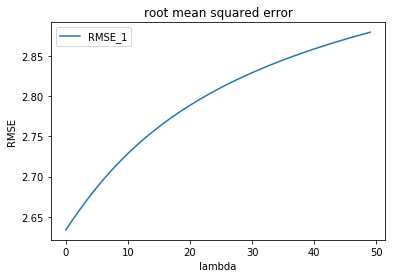

In [8]:
#print ws[0:50,:]
#print X_2
RMSE_1 = y_re(X_2, y_2, ws, 50)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(RMSE_1, label = "RMSE_1")
ax.set_title(u"root mean squared error")
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()
#print RMSE_1

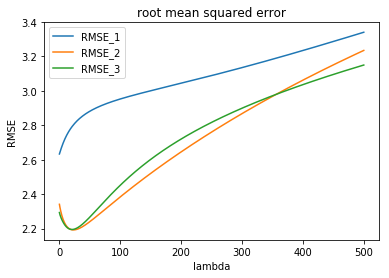

In [9]:
X_1_1 = X_p(X_1, 1)
X_2_1 = X_p(X_2, 1)
ws_1 = ridge_mat(X_1_1, y_1, 501)
RMSE_1 =  y_re(X_2_1, y_2, ws_1, 501)
X_1_2 = X_p(X_1, 2)
X_2_2 = X_p(X_2, 2)
ws_2 = ridge_mat(X_1_2, y_1, 501)
RMSE_2 =  y_re(X_2_2, y_2, ws_2, 501)
X_1_3 = X_p(X_1, 3)
X_2_3 = X_p(X_2, 3)
ws_3 = ridge_mat(X_1_3, y_1, 501)
RMSE_3 =  y_re(X_2_3, y_2, ws_3, 501)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(RMSE_1, label = "RMSE_1")
plt.plot(RMSE_2, label = "RMSE_2")
plt.plot(RMSE_3, label = "RMSE_3")
ax.set_title(u"root mean squared error")
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [15]:
print RMSE_2
print min(RMSE_2)
print RMSE_2.index(min(RMSE_2))
print RMSE_2.index(2.3412739746108997)


[2.3412739746108997, 2.3214587203722536, 2.3043551316856274, 2.2893962511423145, 2.2762214258891182, 2.2645761446562225, 2.2542672090435825, 2.2451403677418758, 2.2370680925758912, 2.2299423521410224, 2.2236700382550634, 2.2181698949233417, 2.2133703487383722, 2.2092079087641592, 2.205625943314327, 2.2025737167908392, 2.2000056127605889, 2.1978804948462782, 2.1961611725550858, 2.1948139490078558, 2.193808233952522, 2.1931162097585095, 2.1927125410653501, 2.1925741208642173, 2.1926798473165436, 2.1930104267426449, 2.1935481990655998, 2.194276982650889, 2.1951819359946332, 2.1962494341197112, 2.1974669578658039, 2.1988229945254614, 2.2003069484971349, 2.2019090608076213, 2.2036203365086204, 2.2054324790803563, 2.2073378310841281, 2.2093293203987576, 2.2114004114557075, 2.2135450609565983, 2.2157576776164878, 2.2180330855280408, 2.2203664907871454, 2.2227534510598792, 2.225189847805543, 2.2276718609010429, 2.230195945438656, 2.2327588104931517, 2.2353573996750828, 2.237988873305933, 2.240

In [35]:
print X_2_1


[[ 0.30957    0.34964    0.013785   0.52674    0.49248    0.277      1.       ]
 [ 1.4821     1.4868     1.5726     0.84226   -1.4649    -1.6232     1.       ]
 [-0.86291   -0.7111    -0.66169   -0.4151     1.1087     1.6343     1.       ]
 [ 0.30957    0.53121   -0.11611    0.94586    0.52872   -0.53739    1.       ]
 [ 1.4821     1.0281     0.89711    0.26774   -1.5736     0.54847    1.       ]
 [-0.86291   -0.92133   -0.37591   -0.83892   -0.01498   -0.80885    1.       ]
 [ 1.4821     1.0472     1.1829     0.53616   -1.2836    -1.6232     1.       ]
 [ 0.30957    0.0534    -0.50581   -0.45983    0.16625   -1.6232     1.       ]
 [ 1.4821     1.4868     1.8324     1.3214    -0.92115   -0.80885    1.       ]
 [-0.86291   -1.0838    -1.1553    -1.4335     0.2025     1.3629     1.       ]
 [ 1.4821     1.181      1.053      1.3685    -0.66742    0.277      1.       ]
 [-0.86291   -1.1125    -1.3632    -1.1686     1.3986     0.54847    1.       ]
 [ 1.4821     1.181      1.1829     1.29

In [36]:
print X_2_2

[[  3.09570000e-01   3.49640000e-01   1.37850000e-02   5.26740000e-01
    4.92480000e-01   2.77000000e-01   1.00000000e+00   9.58335849e-02
    1.22248130e-01   1.90026225e-04   2.77455028e-01   2.42536550e-01
    7.67290000e-02]
 [  1.48210000e+00   1.48680000e+00   1.57260000e+00   8.42260000e-01
   -1.46490000e+00  -1.62320000e+00   1.00000000e+00   2.19662041e+00
    2.21057424e+00   2.47307076e+00   7.09401908e-01   2.14593201e+00
    2.63477824e+00]
 [ -8.62910000e-01  -7.11100000e-01  -6.61690000e-01  -4.15100000e-01
    1.10870000e+00   1.63430000e+00   1.00000000e+00   7.44613668e-01
    5.05663210e-01   4.37833656e-01   1.72308010e-01   1.22921569e+00
    2.67093649e+00]
 [  3.09570000e-01   5.31210000e-01  -1.16110000e-01   9.45860000e-01
    5.28720000e-01  -5.37390000e-01   1.00000000e+00   9.58335849e-02
    2.82184064e-01   1.34815321e-02   8.94651140e-01   2.79544838e-01
    2.88788012e-01]
 [  1.48210000e+00   1.02810000e+00   8.97110000e-01   2.67740000e-01
   -1.5736

In [37]:
print X_2_3

[[  3.09570000e-01   3.49640000e-01   1.37850000e-02   5.26740000e-01
    4.92480000e-01   2.77000000e-01   1.00000000e+00   9.58335849e-02
    1.22248130e-01   1.90026225e-04   2.77455028e-01   2.42536550e-01
    7.67290000e-02   2.96672029e-02   4.27428360e-02   2.61951151e-06
    1.46146661e-01   1.19444400e-01   2.12539330e-02]
 [  1.48210000e+00   1.48680000e+00   1.57260000e+00   8.42260000e-01
   -1.46490000e+00  -1.62320000e+00   1.00000000e+00   2.19662041e+00
    2.21057424e+00   2.47307076e+00   7.09401908e-01   2.14593201e+00
    2.63477824e+00   3.25561111e+00   3.28668178e+00   3.88915108e+00
    5.97500851e-01  -3.14357580e+00  -4.27677204e+00]
 [ -8.62910000e-01  -7.11100000e-01  -6.61690000e-01  -4.15100000e-01
    1.10870000e+00   1.63430000e+00   1.00000000e+00   7.44613668e-01
    5.05663210e-01   4.37833656e-01   1.72308010e-01   1.22921569e+00
    2.67093649e+00  -6.42534580e-01  -3.59577109e-01  -2.89710152e-01
   -7.15250550e-02   1.36283144e+00   4.36511151e+00